In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
'chmod 600 /content/kaggle.json'
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json 


In [ ]:
!kaggle datasets download 'msambare/fer2013'

 83% 50.0M/60.3M [00:00<00:00, 84.0MB/s]
100% 60.3M/60.3M [00:00<00:00, 95.9MB/s]


In [ ]:
import zipfile
dataset_zip = zipfile.ZipFile('/content/fer2013.zip','r')
dataset_zip.extractall('dataset')
dataset_zip.close()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten , Dropout,MaxPool2D, BatchNormalization, Dropout,Activation

In [23]:
datagen_train = ImageDataGenerator(
    rescale=1./255
)

datagen_val = ImageDataGenerator(
    rescale=1./255
)
batch_size = 32

In [5]:
import shutil

shutil.rmtree('/content/dataset/train/surprise')
shutil.rmtree('/content/dataset/train/angry')
shutil.rmtree('/content/dataset/train/disgust')
shutil.rmtree('/content/dataset/train/fear')
shutil.rmtree('/content/dataset/test/surprise')
shutil.rmtree('/content/dataset/test/angry')
shutil.rmtree('/content/dataset/test/disgust')
shutil.rmtree('/content/dataset/test/fear')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/dataset/train/surprise'

In [24]:
train_ds = datagen_train.flow_from_directory(
    directory='dataset/train',
    color_mode="grayscale",
    batch_size=32,
    target_size = (48,48),
    shuffle=False,
)



val_ds =datagen_val.flow_from_directory(
    directory='dataset/test',
    color_mode="grayscale",
    batch_size=32,
        target_size = (48,48),
    shuffle=False,
)

Found 17010 images belonging to 3 classes.
Found 4254 images belonging to 3 classes.


In [11]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 3

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))
model.summary()

C:\Users\lokes\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,476,675 (17.08 MB)

 Trainable params: 4,472,707 (17.06 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model.keras", monitor='val_acc', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
callbacks_list = [early_stopping,checkpoint]

In [12]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[callbacks_list])

Epoch 1/30
532/532 [==============================] - ETA: 0s - loss: 1.1913 - accuracy: 0.4215
Epoch 1: saving model to model.h5
532/532 [==============================] - 19s 28ms/step - loss: 1.1913 - accuracy: 0.4215 - val_loss: 1.1067 - val_accuracy: 0.3284


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
530/532 [============================>.] - ETA: 0s - loss: 1.0730 - accuracy: 0.4937
Epoch 2: saving model to model.h5
532/532 [==============================] - 15s 28ms/step - loss: 1.0721 - accuracy: 0.4942 - val_loss: 1.0344 - val_accuracy: 0.4751
Epoch 3/30
530/532 [============================>.] - ETA: 0s - loss: 0.9812 - accuracy: 0.5385
Epoch 3: saving model to model.h5
532/532 [==============================] - 14s 27ms/step - loss: 0.9805 - accuracy: 0.5390 - val_loss: 0.9530 - val_accuracy: 0.5280
Epoch 4/30
532/532 [==============================] - ETA: 0s - loss: 0.9051 - accuracy: 0.5743
Epoch 4: saving model to model.h5
532/532 [==============================] - 17s 31ms/step - loss: 0.9051 - accuracy: 0.5743 - val_loss: 0.8225 - val_accuracy: 0.6032
Epoch 5/30
532/532 [==============================] - ETA: 0s - loss: 0.8554 - accuracy: 0.6034
Epoch 5: saving model to model.h5
532/532 [==============================] - 14s 27ms/step - loss: 0.8554 - accurac

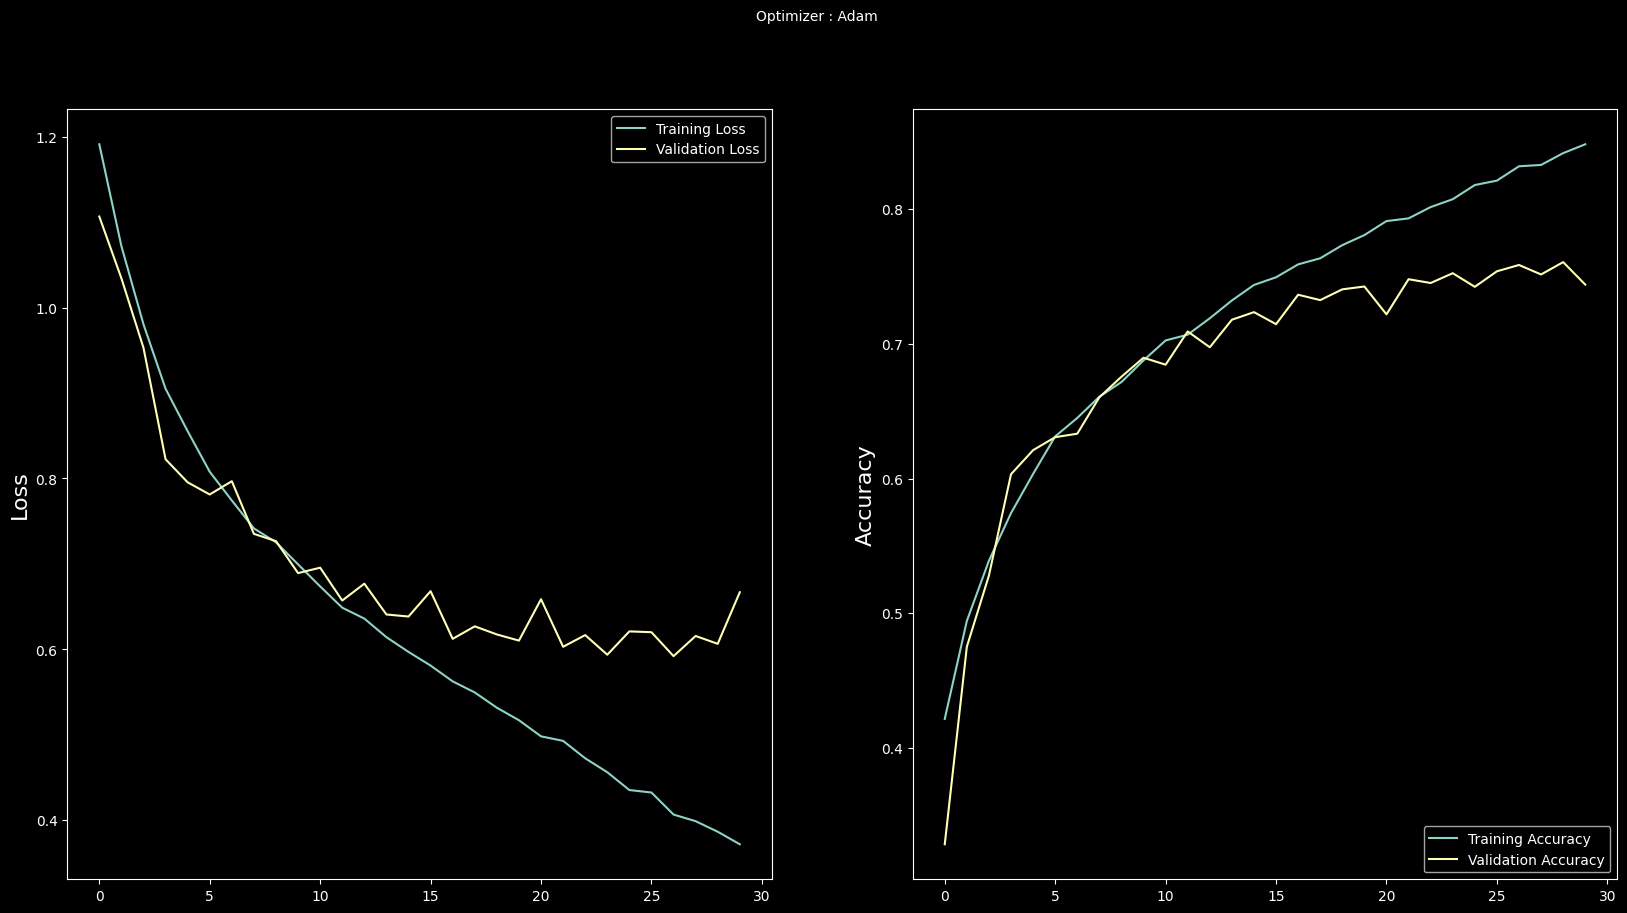

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [26]:
loss ,accuracy = model.evaluate(val_ds)

  5/133 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8827 - loss: 0.3065

C:\Users\lokes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8378 - loss: 0.4129


In [27]:
accuracy

0.7588152289390564

In [25]:
val_ds.class_indices

{'happy': 0, 'neutral': 1, 'sad': 2}

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import PIL
img_path = 'dataset/test/sad/PrivateTest_10247676.jpg'
img = image.load_img(img_path, target_size=(48, 48),color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

predictions = model.predict(img_array)

np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2

In [14]:
model.load_weights('model.h5')

133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step


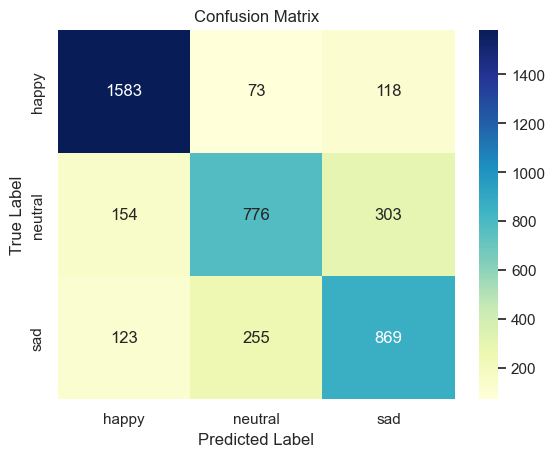

In [30]:
import numpy as np
import seaborn as sns 
from sklearn.metrics import confusion_matrix

validation_labels = val_ds.classes
validation_pred_probs = model.predict(val_ds)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_ds.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report , f1_score
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(validation_labels,validation_pred_labels))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1774
           1       0.70      0.63      0.66      1233
           2       0.67      0.70      0.69      1247

    accuracy                           0.76      4254
   macro avg       0.74      0.74      0.74      4254
weighted avg       0.76      0.76      0.76      4254



In [36]:
f1 = f1_score(validation_labels, validation_pred_labels ,average='weighted')

In [37]:
f1

0.7566157237955403

In [41]:
train_ds1 = datagen_train.flow_from_directory(
    directory='newdata/train',
    color_mode="grayscale",
    batch_size=32,
    target_size = (48,48),
)



val_ds1 =datagen_val.flow_from_directory(
    directory='newdata/validation',
    color_mode="grayscale",
    batch_size=32,
        target_size = (48,48),
    shuffle=False,
)

Found 17084 images belonging to 3 classes.
Found 4180 images belonging to 3 classes.


In [47]:
history1 = model.fit(train_ds1, epochs=30, validation_data=val_ds1, callbacks=[callbacks_list])

Epoch 1/30


C:\Users\lokes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8086 - loss: 0.4658
Epoch 1: saving model to model.keras
534/534 ━━━━━━━━━━━━━━━━━━━━ 83s 150ms/step - accuracy: 0.8086 - loss: 0.4658 - val_accuracy: 0.8694 - val_loss: 0.3508
Epoch 2/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8218 - loss: 0.4402
Epoch 2: saving model to model.keras
534/534 ━━━━━━━━━━━━━━━━━━━━ 81s 151ms/step - accuracy: 0.8217 - loss: 0.4402 - val_accuracy: 0.8562 - val_loss: 0.3665
Epoch 3/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8379 - loss: 0.3976
Epoch 3: saving model to model.keras
534/534 ━━━━━━━━━━━━━━━━━━━━ 79s 149ms/step - accuracy: 0.8378 - loss: 0.3976 - val_accuracy: 0.8419 - val_loss: 0.4104
Epoch 4/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8350 - loss: 0.3998
Epoch 4: saving model to model.keras
534/534 ━━━━━━━━━━━━━━━━━━━━ 80s 149ms/step - accuracy: 0.8350 - loss: 0.3998 - val_accuracy: 0.8565 - val_loss: 0.3705
Epoch 4: early stopping
Restori

In [51]:
loss ,accuaracy1 = model.evaluate(val_ds1)

131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9242 - loss: 0.2186


In [53]:
accuaracy1

0.8693779706954956

In [54]:
validation_labels1 = val_ds1.classes
validation_pred_probs1 = model.predict(val_ds1)
validation_pred_labels1 = np.argmax(validation_pred_probs1, axis=1)
print(classification_report(validation_labels1,validation_pred_labels1))

131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1825
           1       0.85      0.77      0.81      1216
           2       0.81      0.84      0.82      1139

    accuracy                           0.87      4180
   macro avg       0.86      0.85      0.86      4180
weighted avg       0.87      0.87      0.87      4180

